In [1]:
import pandas as pd
from sklearn.datasets import load_diabetes

In [6]:
df = pd.read_csv('data/penguins.csv')

In [7]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male


Let's try to predict sex from the biometrical measurements

In [8]:
X = df.select_dtypes('number')
X

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,36.7,19.3,193.0,3450.0
4,39.3,20.6,190.0,3650.0
...,...,...,...,...
328,55.8,19.8,207.0,4000.0
329,43.5,18.1,202.0,3400.0
330,49.6,18.2,193.0,3775.0
331,50.8,19.0,210.0,4100.0


In [115]:
df.sex == 'male'

0       True
1      False
2      False
3      False
4       True
       ...  
328     True
329    False
330     True
331     True
332    False
Name: sex, Length: 333, dtype: bool

In [116]:
y = df.sex == 'male'
y

0       True
1      False
2      False
3      False
4       True
       ...  
328     True
329    False
330     True
331     True
332    False
Name: sex, Length: 333, dtype: bool

## Lazy Classifier

Assign the class of the most numerous (male)

In [117]:
sum(y) / len(y)

0.5045045045045045

We should be doing better than that

## Logistic regression

In [121]:
from sklearn.linear_model import LogisticRegression 

In [122]:
lr = LogisticRegression()

In [123]:
lr.fit(X,y)

LogisticRegression()

In [124]:
lr.score(X,y)

0.9099099099099099

In [125]:
y_pred = lr.predict(X)

In [126]:
y_pred

array([ True, False, False, False,  True, False,  True, False,  True,
        True, False, False,  True, False,  True, False, False,  True,
        True, False,  True, False, False, False,  True, False,  True,
       False,  True, False,  True,  True, False, False,  True, False,
        True, False,  True, False,  True, False, False,  True, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True,  True,  True, False,  True,  True,
       False,  True, False, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False,  True, False,  True, False,  True,
        True,  True, False,  True, False, False, False,  True, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False,  True,

In [127]:
from sklearn.metrics import confusion_matrix

In [128]:
confusion_matrix(y, y_pred)

array([[149,  16],
       [ 14, 154]])

## What did our model learn?

In [129]:
lr.coef_

array([[ 0.10491325,  1.91976577, -0.0337788 ,  0.00528625]])

In [130]:
lr.intercept_

array([-52.87539494])

In [131]:
X.loc[0,]

bill_length_mm         39.1
bill_depth_mm          18.7
flipper_length_mm     181.0
body_mass_g          3750.0
Name: 0, dtype: float64

In [140]:
lr.intercept_ + sum(X.loc[0,].values * lr.coef_[0]) > 0.5

array([ True])

## Preprocessing

In [60]:
from sklearn.preprocessing import StandardScaler

In [90]:
X_scaled = StandardScaler().fit_transform(X)

In [91]:
X_scaled

array([[-0.89604189,  0.7807321 , -1.42675157, -0.56847478],
       [-0.82278787,  0.11958397, -1.06947358, -0.50628618],
       [-0.67627982,  0.42472926, -0.42637319, -1.1903608 ],
       ...,
       [ 1.02687621,  0.52644436, -0.56928439, -0.53738048],
       [ 1.24663828,  0.93330475,  0.64546078, -0.13315457],
       [ 1.13675725,  0.7807321 , -0.2120064 , -0.53738048]])

In [92]:
lr = LogisticRegression()

In [93]:
lr.fit(X_scaled,y)

LogisticRegression()

In [94]:
lr.score(X_scaled,y)

0.9009009009009009

## PCA

In [95]:
from sklearn.decomposition import PCA

In [107]:
X_pca = PCA(n_components=2).fit_transform(X_scaled)

In [108]:
lr = LogisticRegression()

In [109]:
lr.fit(X_pca,y)

LogisticRegression()

In [110]:
lr.score(X_pca,y)

0.8108108108108109

## Sample separability

In [141]:
import matplotlib.pyplot as plt

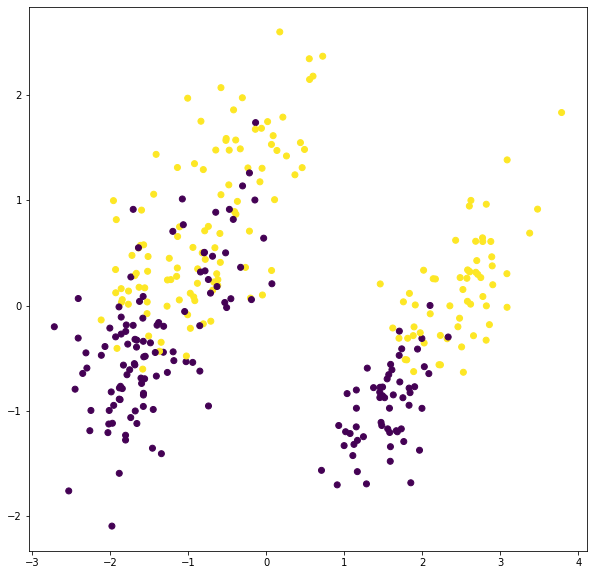

In [143]:
plt.figure(figsize=(10,10))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y)